# Player Analytics - Trying to predict the number of goals scored in a season

# Linear Regression Using SKLEARN

Choose Cristiano Ronaldo because of his consistency and endurance

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [1]:
pwd

'C:\\Users\\Ramesh Narayanan'

In [2]:
cd H:/DSP project/Data sets

H:\DSP project\Data sets


In [5]:
my_data = pd.read_csv('CR.csv') #read the data

This is with respect to ronaldo. This is a small dataset containing stats wrt Ronaldo

In [6]:
my_data.head()

,Season,Team Rating,Ronaldo_rating,Matches,Shots,Ontarget,Shot_accuracy,Goals
0,2007,84,87,49,174,77,0.442529,42
1,2008,87,91,53,181,57,0.314917,26
2,2009,85,91,35,124,54,0.435484,33
3,2010,85,93,54,212,91,0.429245,53
4,2011,85,92,55,229,101,0.441048,60


Drop unncessary column for regression - Season

In [7]:
my_data= my_data.drop('Season', 1)

Remove correlated columns to avoid Multi Collinearity

In [8]:
my_data.corr()

,Team Rating,Ronaldo_rating,Matches,Shots,Ontarget,Shot_accuracy,Goals
Team Rating,1.000000,0.534504,0.067082,0.334320,0.079040,-0.419874,-0.216844
Ronaldo_rating,0.534504,1.000000,0.042018,0.570668,0.421615,-0.073108,0.306421
Matches,0.067082,0.042018,1.000000,0.592621,0.479540,-0.024382,0.524915
Shots,0.334320,0.570668,0.592621,1.000000,0.890514,0.179815,0.685401
Ontarget,0.079040,0.421615,0.479540,0.890514,1.000000,0.606910,0.876247
Shot_accuracy,-0.419874,-0.073108,-0.024382,0.179815,0.606910,1.000000,0.697277
Goals,-0.216844,0.306421,0.524915,0.685401,0.876247,0.697277,1.000000


Shot Accuracy - is calculated as a percentage of on target shots wrt to total shots

In [9]:
my_data=my_data.drop('Shot_accuracy',1)

In [10]:
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,Team Rating,Ronaldo_rating,Matches,Shots,Ontarget,Goals
0,-1.273489,-2.635150,-0.030151,-0.848651,-0.445527,-0.484536
1,1.198578,-0.405408,0.633174,-0.631554,-1.598656,-1.954852
2,-0.449467,-0.405408,-2.351788,-2.399343,-1.771626,-1.311589
3,-0.449467,0.709464,0.799005,0.329874,0.361663,0.526306
4,-0.449467,0.152028,0.964836,0.857110,0.938228,1.169570


Import necessary packages

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
feature_cols=['Team Rating','Ronaldo_rating','Matches','Shots','Ontarget']

In [13]:
A=my_data[feature_cols]
B=my_data['Goals']

In [14]:
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()
linearreg.fit(A,B)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear regression -- Intercepts and coefficients for 5 variables

In [15]:
print(linearreg.intercept_,linearreg.coef_)

9.52840363032892e-16 [-0.27710277  0.33459962  0.37025606 -0.7169555   1.21798311]


In [16]:
B_pred=linearreg.predict(A)

Calculate the RMSE

In [59]:
from sklearn import metrics
rmse_sk=np.sqrt(metrics.mean_squared_error(B,B_pred))
print(np.sqrt(metrics.mean_squared_error(B,B_pred)))

0.24712668088245276


Calculate R squred

In [29]:
r2 = linearreg.score(A, B)
print(r2)

0.9328212439556246


# Mathematical implementation of Linear Regression

# Creating the Feature Matrix and the Dependent Variable Matrix

In [ ]:
X is the feature vector with has all the independedt variabls. Y is the dependent vector

In [77]:


# The first 5 columns are features
X = my_data.iloc[:,0:5]
# Create a vector with 1's/ y= θ0x0 + θ1x1 + θ2x2
#x0 is considered as 1 and thats filled with a '1' vector matrix
ones = np.ones([X.shape[0],1])
#Merge the X0 with other features
X = np.concatenate((ones,X),axis=1)


#The last column is Y which is dependent variable
y = my_data.iloc[:,5:6].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,6])

#Learning rate is alpha which will determine the hop during gradient descent. Too low learning rate will take a long time to reach 
#global optima and too high alpha might lead us missing out on global optima
alpha = 0.01
iters = 1000

# USING ALGEBRA

The logic has been taken from https://datascienceplus.com/

Import inverse function

In [18]:
from numpy.linalg import inv

In [21]:
# calculate coefficients using closed-form solution - Normal equation
#Theta =(XTX)−1XTy - coefficients = ( Xtranspose X ) inverse * X *Y
coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [22]:
coeffs

array([[ 9.80118764e-16],
       [-2.77102773e-01],
       [ 3.34599625e-01],
       [ 3.70256064e-01],
       [-7.16955500e-01],
       [ 1.21798311e+00]])

# USING OLS

In [23]:
from statsmodels.regression.linear_model import OLS

In [24]:
coeffs_lm = OLS(y, X).fit().params

In [25]:
print(coeffs_lm)

[-8.67361738e-18 -2.77102773e-01  3.34599625e-01  3.70256064e-01
 -7.16955500e-01  1.21798311e+00]


# CALCULATING THE COST FUNCTION

In [30]:
#computecost. It calculates the cost based on X, Y and theta

#Cost function in general = 1/2m ( Hyp - Y)^2

def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

Gradient descent is used to minimize the cost function
The logic is taken from https://medium.com/we-are-orb/multivariate-linear-regression-in-python
The cost function and gradient descent are almost same.
The gradient descent is a matrix operatio. It will run as long as the number of columns in Theta and the feature vector are same.

The gradient descent is done for 1000 iterations to minimize the cost.
The cost function should decrease after each iteration.


In [78]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print("Gradient Descent",g)

finalCost = computeCost(X,y,g)
print("FinalCost",finalCost)

Gradient Descent [[ 5.25047177e-16 -3.89732564e-01  2.26853333e-01  2.19772654e-01
  -8.26781497e-02  7.55526018e-01]]
FinalCost 0.04662692735104188


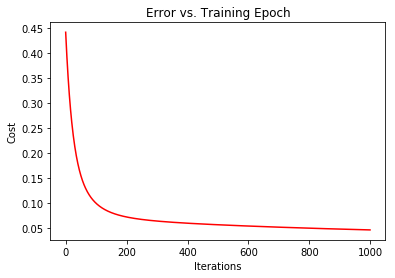

In [79]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')
plt.show()

# OUTPUTS

In [38]:
print("SCIKIT LEARN",linearreg.coef_)

SCIKIT LEARN [-0.27710277  0.33459962  0.37025606 -0.7169555   1.21798311]


In [47]:
algeb=coeffs.T

In [50]:
print("Matrix Algebra", algeb[:,1:])

Matrix Algebra [[-0.27710277  0.33459962  0.37025606 -0.7169555   1.21798311]]


In [44]:
print("Using OLS",coeffs_lm[1:6])

Using OLS [-0.27710277  0.33459962  0.37025606 -0.7169555   1.21798311]


In [55]:
print("Gradient Descent",g[:,1:])

Gradient Descent [[-0.38973256  0.22685333  0.21977265 -0.08267815  0.75552602]]


In [60]:
print("RMSE using SKLEARN",rmse_sk)

RMSE using SKLEARN 0.24712668088245276


In [58]:
print("Final cost function after gradient descent",finalCost)

Final cost function after gradient descent 0.04662692735104188
